In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.gridspec import GridSpec
import seaborn as sns

## Importing the data

In [2]:
simple_salary = pd.read_csv("salary.csv")

In [3]:
simple_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## Checking for any missing values

In [4]:
simple_salary.isnull().any()

salary          True
exprior        False
yearsworked    False
yearsrank      False
market         False
degree         False
otherqual      False
position       False
male           False
Field          False
yearsabs       False
dtype: bool

The salary column has a missing value, I have decided to calculate the mean and use it where there are missing values.

In [5]:
# Filling in the missing value in the salary column with the mean.
simple_salary = simple_salary.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [6]:
simple_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12672.762650,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60306.250000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


From the above table we can see that the mean for salary is 50863.22. This is the value that will be used.

In [7]:
simple_salary.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

We can now see that there are no missing values since the mean has been put in place

In [88]:
# setting the independent and dependant variables
X = simple_salary
y = simple_salary["salary"]

#Creating training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(411, 11) (411,)
(103, 11) (103,)


## Create histograms to show the distribution of the variables

Text(0.5, 1.0, 'Relationship between Years Worked and Salary')

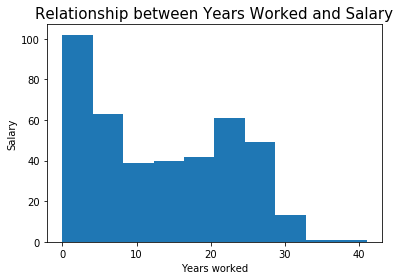

In [9]:
# Creating a histogram for years worked and salary
plt.hist(x= 'yearsworked', data=X_train, bins = 10)
# plt.figure(figsize=(13,10))
plt.style.use('ggplot')
plt.xlabel('Years worked')
plt.ylabel('Salary')
plt.title('Relationship between Years Worked and Salary', fontsize = 15)

## Create a scatterplot showing the relationship between Years Worked and Salary.

Text(0.5, 1.0, 'Relationship between Years Worked and Salary')

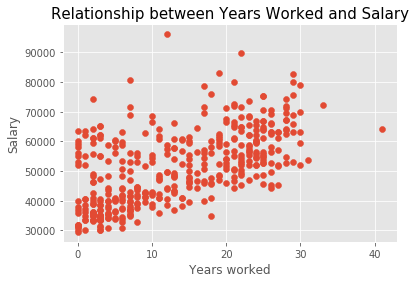

In [10]:
plt.scatter(x='yearsworked', y='salary', alpha=1, data=X_train)
plt.xlabel('Years worked')
plt.ylabel('Salary')
plt.title('Relationship between Years Worked and Salary', fontsize = 15)

The scattergraph shows a positive linear relationship between salary and yearsdworked. 

## Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

In [94]:
constant = sm.add_constant(X_train['yearsworked'])
model = sm.OLS(y_train,constant)
results = model.fit()

print(results.summary())
# model.summary()

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     275.7
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           1.08e-47
Time:                        16:15:21   Log-Likelihood:                -4348.7
No. Observations:                 411   AIC:                             8701.
Df Residuals:                     409   BIC:                             8710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.997e+04    787.343     50.762      

/home/puleng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


R^2 is below 50%, it is low which means that the relationship between the variables is weak. 

## What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

In [93]:
constant

,const,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
124,1.0,33787.00000,7,5,1,0.77,1,0,2,1,4,1
75,1.0,41483.00000,1,5,2,0.93,1,0,2,1,3,1
33,1.0,37905.30078,0,10,5,0.78,1,0,2,1,3,0
93,1.0,39156.00000,0,8,2,0.88,1,0,2,1,3,0
214,1.0,59472.00000,5,15,15,0.89,1,0,2,1,1,1
163,1.0,48289.00000,2,13,1,1.10,1,0,3,1,3,0
79,1.0,29000.00000,6,0,0,0.78,0,0,1,1,3,0
433,1.0,39461.00000,0,7,1,0.99,0,1,2,0,3,1
458,1.0,33010.00000,3,8,8,0.79,1,0,1,0,3,29
102,1.0,40512.00000,8,1,1,0.84,1,0,1,1,2,1


## What do the 95% confidence intervals [0.025, 0.975] mean?

## Calculate the expected salary for someone with 12 years’ work experience.

In [105]:
years_12 = pd.DataFrame({'yearsworked': [12]})


## Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [56]:
years_80 = pd.DataFrame({'yearsworked':[80]})

## We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

# Other factors to look at are:

Years worked

Position

Yearsrank

Work experience

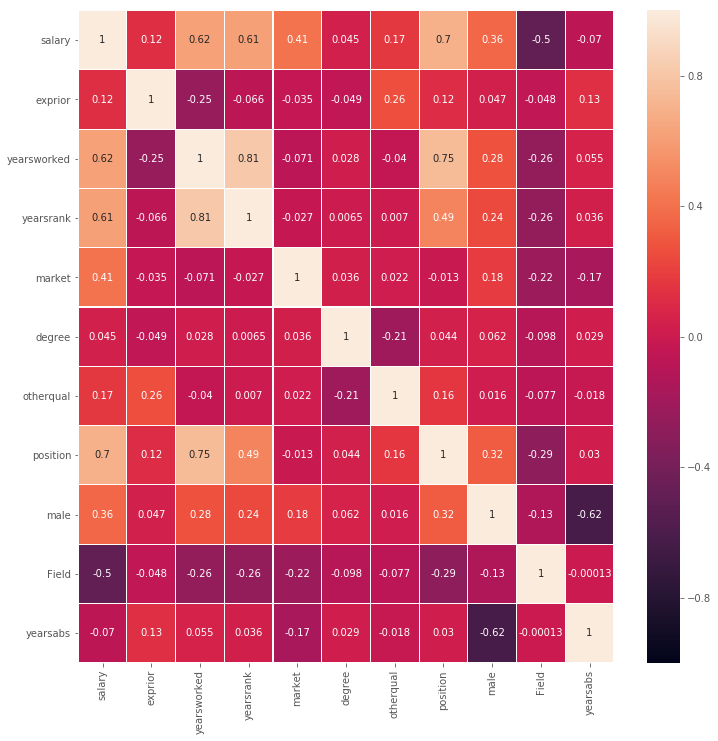

In [31]:
salary_cor = simple_salary.corr()
plt.figure(figsize=(12,12))
sns.heatmap(salary_cor, vmin=-1, vmax=1, annot=True, linewidth=0.1)

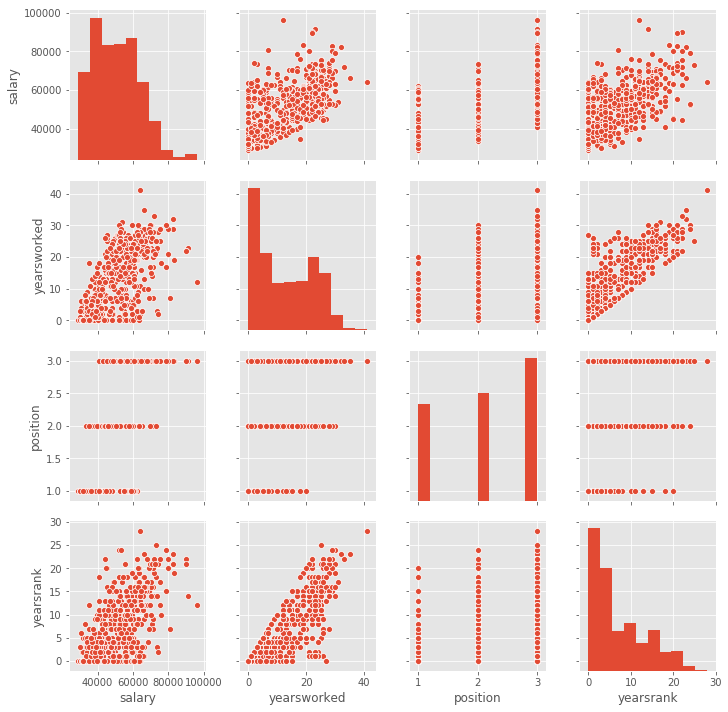

In [36]:
sns.pairplot(simple_salary[['salary', 'yearsworked', 'position', 'yearsrank']])

## Now fit your model to your test set. Simply use your existing, model, to predict salaries in the test set.

In [116]:
constant_2 = sm.add_constant(X_test['yearsworked'])




/home/puleng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [117]:
pred_train = results.predict(constant)
pred_train

124    44055.086604
75     44055.086604
33     48143.303268
93     46508.016602
214    52231.519933
163    50596.233267
79     39966.869939
433    45690.373270
458    46508.016602
102    40784.513272
310    60407.953262
221    45690.373270
187    48960.946601
69     45690.373270
321    60407.953262
130    56319.736597
39     42419.799938
469    50596.233267
53     44055.086604
359    57955.023263
17     40784.513272
497    55502.093264
77     40784.513272
132    43237.443271
177    49778.589934
501    57955.023263
384    59590.309929
280    58772.666596
227    41602.156605
393    41602.156605
           ...     
160    45690.373270
16     41602.156605
483    53866.806599
147    54684.449932
51     39966.869939
330    41602.156605
241    60407.953262
314    51413.876600
406    42419.799938
98     48143.303268
479    49778.589934
430    44872.729937
151    51413.876600
216    43237.443271
13     42419.799938
94     44055.086604
203    39966.869939
253    57137.379930
142    43237.443271


In [112]:
pred_test = results.predict(constant_2)
pred_test

110    47325.659935
508    55502.093264
407    39966.869939
491    50596.233267
40     42419.799938
343    62860.883261
357    60407.953262
206    45690.373270
192    54684.449932
396    41602.156605
421    44055.086604
159    52231.519933
24     41602.156605
12     42419.799938
470    57955.023263
287    58772.666596
121    48960.946601
181    48143.303268
462    49778.589934
52     40784.513272
90     44872.729937
73     44872.729937
391    40784.513272
166    51413.876600
201    53049.163266
173    52231.519933
487    54684.449932
84     45690.373270
50     42419.799938
370    63678.526594
           ...     
372    64496.169926
495    55502.093264
274    57137.379930
375    57955.023263
473    52231.519933
68     43237.443271
507    58772.666596
57     41602.156605
263    61225.596595
184    53866.806599
446    45690.373270
440    48143.303268
329    53866.806599
408    42419.799938
365    66131.456592
43     42419.799938
259    60407.953262
171    54684.449932
66     44055.086604
